In [1]:
import osmnx as ox
import networkx as nx
from shapely.geometry import box, Polygon
import random

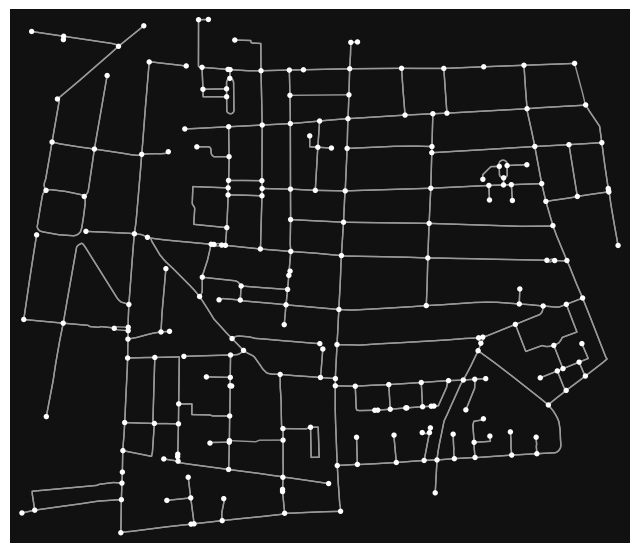

In [2]:
place_name = "Hackney, UK"
area_df = ox.geocode_to_gdf(place_name)
clip_polygon = box(-0.08, 51.545, -0.06, 51.535)
area_df = area_df.clip(clip_polygon) # temp
area = area_df.geometry.iloc[0]
graph = ox.graph_from_polygon(area, network_type="drive")
#graph = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
list_of_nodes = list(graph.nodes)
fig, ax = ox.plot_graph(graph)

In [3]:
road_tags = {"highway": True}
roads = ox.features_from_polygon(area, road_tags)

In [4]:
building_tags = {"building": True}
buildings = ox.features_from_polygon(area, building_tags)
buildings = buildings[buildings.geometry.apply(lambda geom: isinstance(geom, (Polygon)))]

In [5]:
print(nodes.head(1))

                y         x  street_count highway                  geometry
osmid                                                                      
107003  51.539603 -0.062667             3     NaN  POINT (-0.06267 51.5396)


In [6]:
print(edges.head(1))

                          osmid   highway maxspeed            name  oneway  \
u      v         key                                                         
107003 654181373 0    206555990  tertiary   20 mph  Shrubland Road   False   

                     reversed     length  \
u      v         key                       
107003 654181373 0       True  37.182418   

                                                               geometry lanes  \
u      v         key                                                            
107003 654181373 0    LINESTRING (-0.06267 51.5396, -0.06272 51.5395...   NaN   

                      ref bridge width tunnel  
u      v         key                           
107003 654181373 0    NaN    NaN   NaN    NaN  


In [7]:
minx, miny, maxx, maxy = nodes.total_bounds
SCREEN_WIDTH, SCREEN_HEIGHT = 900, 900
scale_x = SCREEN_WIDTH / (maxx - minx)
scale_y = SCREEN_HEIGHT / (maxy - miny)

def normalize_coords(x, y):
    norm_x = int((x - minx) * scale_x)
    norm_y = int(SCREEN_HEIGHT - (y - miny) * scale_y)  # flip Y
    return (norm_x, norm_y)

In [8]:
node_positions = {
    node: normalize_coords(data['x'], data['y'])
    for node, data in graph.nodes(data=True)
}

starting_point = (random.choice(list_of_nodes))
destination = (random.choice(list_of_nodes))

route = nx.shortest_path(graph, starting_point, destination, weight="length")
for i in route:
    print("Node ID: {}, Coord: {}".format(i, node_positions.get(i)))

Node ID: 18061271, Coord: (488, 300)
Node ID: 34214581, Coord: (442, 299)
Node ID: 34214578, Coord: (405, 297)
Node ID: 34214584, Coord: (362, 296)
Node ID: 34214587, Coord: (362, 282)
Node ID: 34214589, Coord: (311, 282)
Node ID: 52755501, Coord: (312, 240)
Node ID: 654181225, Coord: (264, 223)


In [9]:
node_positions

{107003: (846, 488),
 107009: (610, 501),
 107010: (478, 508),
 107016: (822, 422),
 107021: (317, 559),
 108566: (155, 706),
 108569: (151, 793),
 108572: (311, 789),
 108573: (393, 802),
 108575: (334, 580),
 108586: (160, 545),
 198270: (150, 842),
 198272: (149, 900),
 198273: (255, 884),
 198274: (302, 878),
 198276: (396, 865),
 198277: (481, 862),
 238700: (482, 414),
 238701: (492, 174),
 243063: (620, 165),
 243064: (762, 156),
 2384924: (45, 214),
 10621465: (145, 47),
 10621468: (14, 21),
 11143458: (688, 580),
 11143461: (553, 640),
 11143462: (473, 642),
 11143463: (476, 782),
 18056496: (689, 558),
 18061265: (757, 80),
 18061266: (636, 85),
 18061268: (834, 76),
 18061269: (886, 302),
 18061270: (617, 295),
 18061271: (488, 300),
 18061272: (612, 418),
 18061273: (784, 287),
 18061584: (425, 88),
 18061623: (359, 402),
 18061624: (285, 394),
 18061627: (494, 86),
 18061628: (449, 178),
 18061630: (403, 88),
 25872435: (641, 164),
 26241875: (53, 139),
 26242184: (36, 299

In [11]:
area_df

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.06135 51.53502, -0.06145 51.53511...",-0.104509,51.519814,-0.016527,51.577784,259486713,relation,51806,51.548882,-0.047669,boundary,administrative,16,0.555167,city_district,London Borough of Hackney,"London Borough of Hackney, London, Greater Lon..."


In [22]:
edges

osmid  \
u           v           key                                      
107003      654181373   0                            206555990   
            654181358   0    [232718226, 402278493, 402278494]   
            107016      0                 [232718226, 8173007]   
107009      707057356   0                              5929484   
            18061272    0                           1418066189   
...                                                        ...   
12367460280 12367460282 0                           1337115120   
            52755472    0               [103073430, 173538687]   
12367460282 12367460280 0                           1337115120   
13085084768 108586      0                            195361748   
            672906685   0                            195361748   

                                             highway maxspeed  \
u           v           key                                     
107003      654181373   0                   tertiary   20 mph   
            654181358   0    [residential, tertiary]   20 mph   
            107016      0                   tertiary   20 mph   
107009      707057356   0                   tertiary   20 mph   
            18061272    0                residential   20 mph   
...                                              ...      ...   
12367460280 12367460282 0                residential   20 mph   
            52755472    0                residential   20 mph   
12367460282 12367460280 0                residential   20 mph   
13085084768 108586      0                      trunk   20 mph   
            672906685   0                      trunk   20 mph   

                                                          name  oneway  \
u           v           key                                              
107003      654181373   0                       Shrubland Road   False   
            654181358   0    [Lansdowne Drive, Trederwen Road]   False   
            107016      0                      Lansdowne Drive   False   
107009      707057356   0                         Albion Drive   False   
            18061272    0                         Malvern Road   False   
...                                                        ...     ...   
12367460280 12367460282 0                      Roseberry Place   False   
            52755472    0       [Roseberry Place, Forest Road]   False   
12367460282 12367460280 0                      Roseberry Place   False   
13085084768 108586      0                       Kingsland Road   False   
            672906685   0                       Kingsland Road   False   

                                  reversed      length  \
u           v           key                              
107003      654181373   0             True   37.182418   
            654181358   0    [False, True]  199.420461   
            107016      0             True   86.826903   
107009      707057356   0             True  199.006585   
            18061272    0             True  101.844675   
...                                    ...         ...   
12367460280 12367460282 0            False   21.057292   
            52755472    0    [False, True]  107.540951   
12367460282 12367460280 0             True   21.057292   
13085084768 108586      0            False    7.262633   
            672906685   0             True   48.711144   

                                                                      geometry  \
u           v           key                                                      
107003      654181373   0    LINESTRING (-0.06267 51.5396, -0.06272 51.5395...   
            654181358   0    LINESTRING (-0.06267 51.5396, -0.06249 51.5393...   
            107016      0    LINESTRING (-0.06267 51.5396, -0.06285 51.5398...   
107009      707057356   0    LINESTRING (-0.06749 51.53946, -0.06699 51.539...   
            18061272    0    LINESTRING (-0.06749 51.53946, -0.06749 51.539...   
...                                                         

In [43]:
route = nx.shortest_path(graph, 46921498, 11143458, weight="length")
point_1 = route[2]
point_2 = route[3]

In [54]:
edge = edges.loc[
    edges.index.get_level_values(0).isin([point_1]) &
    edges.index.get_level_values(1).isin([point_2])
]
int((edge.maxspeed.item())[:-4])

20

In [41]:
edges

osmid  \
u           v           key                                      
107003      654181373   0                            206555990   
            654181358   0    [232718226, 402278493, 402278494]   
            107016      0                 [232718226, 8173007]   
107009      707057356   0                              5929484   
            18061272    0                           1418066189   
...                                                        ...   
12367460280 12367460282 0                           1337115120   
            52755472    0               [103073430, 173538687]   
12367460282 12367460280 0                           1337115120   
13085084768 108586      0                            195361748   
            672906685   0                            195361748   

                                             highway maxspeed  \
u           v           key                                     
107003      654181373   0                   tertiary   20 mph   
            654181358   0    [residential, tertiary]   20 mph   
            107016      0                   tertiary   20 mph   
107009      707057356   0                   tertiary   20 mph   
            18061272    0                residential   20 mph   
...                                              ...      ...   
12367460280 12367460282 0                residential   20 mph   
            52755472    0                residential   20 mph   
12367460282 12367460280 0                residential   20 mph   
13085084768 108586      0                      trunk   20 mph   
            672906685   0                      trunk   20 mph   

                                                          name  oneway  \
u           v           key                                              
107003      654181373   0                       Shrubland Road   False   
            654181358   0    [Lansdowne Drive, Trederwen Road]   False   
            107016      0                      Lansdowne Drive   False   
107009      707057356   0                         Albion Drive   False   
            18061272    0                         Malvern Road   False   
...                                                        ...     ...   
12367460280 12367460282 0                      Roseberry Place   False   
            52755472    0       [Roseberry Place, Forest Road]   False   
12367460282 12367460280 0                      Roseberry Place   False   
13085084768 108586      0                       Kingsland Road   False   
            672906685   0                       Kingsland Road   False   

                                  reversed      length  \
u           v           key                              
107003      654181373   0             True   37.182418   
            654181358   0    [False, True]  199.420461   
            107016      0             True   86.826903   
107009      707057356   0             True  199.006585   
            18061272    0             True  101.844675   
...                                    ...         ...   
12367460280 12367460282 0            False   21.057292   
            52755472    0    [False, True]  107.540951   
12367460282 12367460280 0             True   21.057292   
13085084768 108586      0            False    7.262633   
            672906685   0             True   48.711144   

                                                                      geometry  \
u           v           key                                                      
107003      654181373   0    LINESTRING (-0.06267 51.5396, -0.06272 51.5395...   
            654181358   0    LINESTRING (-0.06267 51.5396, -0.06249 51.5393...   
            107016      0    LINESTRING (-0.06267 51.5396, -0.06285 51.5398...   
107009      707057356   0    LINESTRING (-0.06749 51.53946, -0.06699 51.539...   
            18061272    0    LINESTRING (-0.06749 51.53946, -0.06749 51.539...   
...                                                         

In [20]:
def get_max_speed(start_node, end_node):
    edge = edges.loc[
    edges.index.get_level_values(0).isin([start_node]) &
    edges.index.get_level_values(1).isin([end_node])
        ]
    return int((edge.maxspeed.item())[:-4])

geopandas.geodataframe.GeoDataFrame

In [56]:
area_df.total_bounds

array([-0.08 , 51.535, -0.06 , 51.545])

In [57]:
width = maxx - minx
height = maxy - miny

# Perimeter = 2 * (width + height)
perimeter_meters = 2 * (width + height)

# Convert to miles
perimeter_miles = perimeter_meters * 0.000621371

print(f"BBox Perimeter: {perimeter_miles:.2f} miles")

BBox Perimeter: 0.00 miles
